In [1]:
import pandas as pd

# Load data
file_path = 'E:\zomoto-Data-Analysis\data\Zomato-data-.csv'  # adjust if needed
df = pd.read_csv(file_path)


<>:4: SyntaxWarning: invalid escape sequence '\z'
<>:4: SyntaxWarning: invalid escape sequence '\z'
C:\Users\Admin\AppData\Local\Temp\ipykernel_33924\2730441881.py:4: SyntaxWarning: invalid escape sequence '\z'
  file_path = 'E:\zomoto-Data-Analysis\data\Zomato-data-.csv'  # adjust if needed


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


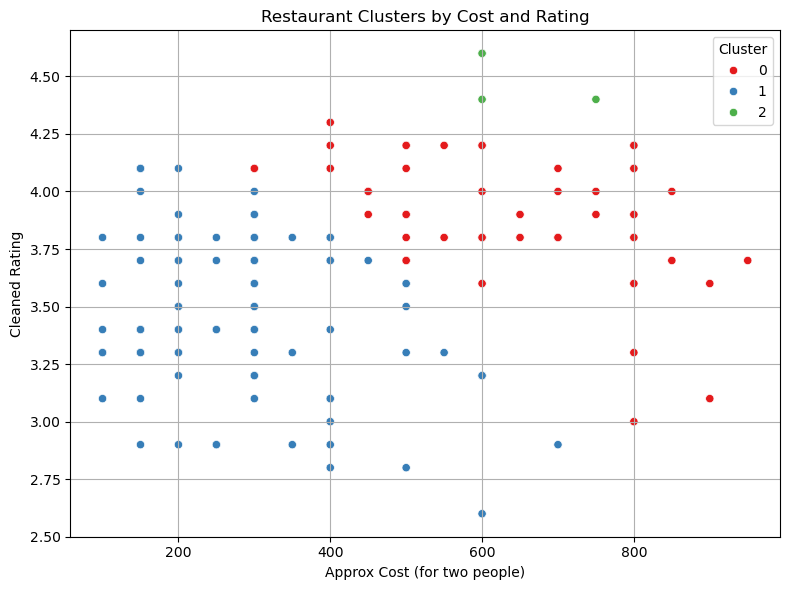


Cluster Summary (Mean Values):
         rate_cleaned  approx_cost(for two people)        votes
cluster                                                        
0            3.892308                   632.692308   394.538462
1            3.448913                   287.500000    46.510870
2            4.500000                   637.500000  3599.250000


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your data (Skip this if df is already defined)
# df = pd.read_csv("your_data.csv")

# Step 2: Clean 'rate' column → Create 'rate_cleaned'
df['rate_cleaned'] = df['rate'].replace(['NEW', '-'], None)
df['rate_cleaned'] = df['rate_cleaned'].str.extract(r'(\d+\.\d+)').astype(float)

# Step 3: Clean 'approx_cost(for two people)' column
# Clean 'approx_cost(for two people)' column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=False)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

# Step 4: Drop rows with missing values in selected features
df = df.dropna(subset=['rate_cleaned', 'approx_cost(for two people)', 'votes'])

# Step 5: Select features for clustering
X = df[['rate_cleaned', 'approx_cost(for two people)', 'votes']]

# Step 6: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Apply KMeans clustering (you can change n_clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Step 8: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,
                x='approx_cost(for two people)',
                y='rate_cleaned',
                hue='cluster',
                palette='Set1')
plt.title('Restaurant Clusters by Cost and Rating')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Cleaned Rating')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Show cluster-wise summary
print("\nCluster Summary (Mean Values):")
print(df.groupby('cluster')[['rate_cleaned', 'approx_cost(for two people)', 'votes']].mean())


In [17]:
import random

def generate_review(rating):
    if rating >= 4.0:
        return random.choice(['Amazing food!', 'Loved it!', 'Fantastic service.'])
    elif rating >= 3.0:
        return random.choice(['It was okay.', 'Decent experience.', 'Could be better.'])
    else:
        return random.choice(['Not good.', 'Bad service.', 'Won’t come back.'])

df['review_text'] = df['rate_cleaned'].apply(generate_review)


In [14]:

print(df.columns.tolist())
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['review_text'].apply(get_sentiment)

# Now explore
print(df[['review_text', 'sentiment']].head())


['name', 'online_order', 'book_table', 'rate', 'votes', 'approx_cost(for two people)', 'listed_in(type)', 'rate_cleaned', 'cluster', 'review_text', 'sentiment']
          review_text  sentiment
0       Amazing food!   0.750000
1           Loved it!   0.875000
2  Decent experience.   0.166667
3  Decent experience.   0.166667
4        It was okay.   0.500000


In [15]:
def label_sentiment(polarity):
    if polarity > 0.2:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment'].apply(label_sentiment)


C:\Users\Admin\AppData\Local\Temp\ipykernel_33924\1380803189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='Set2')


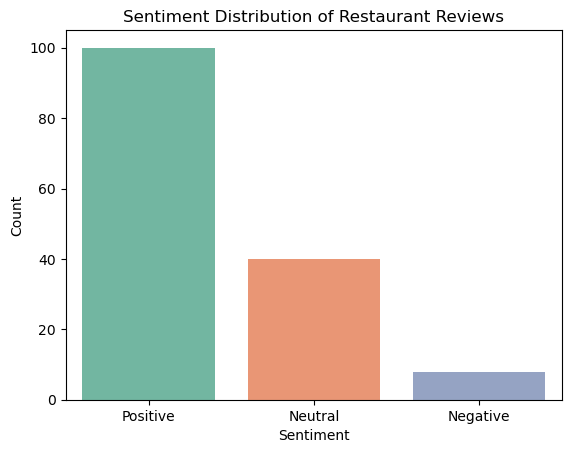

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment_label', palette='Set2')
plt.title("Sentiment Distribution of Restaurant Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
